In [2]:
import importlib
from pathlib import Path
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import Process
from time import sleep
import matplotlib.colors as mc
import colorsys

from mapra import prep

In [6]:
!jupyter nbconvert --to pdf dataset_intro.ipynb

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

In [6]:
importlib.reload(prep)

# the directory to search
wd = Path('.').resolve().parent
print(wd)
(wd / 'plots').mkdir(parents=True, exist_ok=True)

data = prep.dataset(wd)
df = data.dataframe
df

/home/quirin/PYTHON/mapra


/home/quirin/PYTHON/mapra/mapra/prep.py:20: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_sequences_prothermdb.fasta
  warnings.warn('unexpected FASTA filename: ' + str(fasta), RuntimeWarning)


326

In [ ]:
len(df.loc[df.DATASET != 'invalid']['UniProt_ID'].unique())

In [7]:
prot_order = sorted(df.UniProt_ID.unique())
print(prot_order[:5])
df = df.loc[df.DATASET != 'invalid'].copy()   # removing invalid rows at this point


def new_df():
    importlib.reload(prep)
    data = prep.dataset(Path('.').resolve().parent)
    new_df = data.dataframe
    return new_df.loc[new_df.DATASET != 'invalid'].copy()  # removing invalid rows at this point

def fresh_df():
    new_df = data.dataframe
    return new_df.loc[new_df.DATASET != 'invalid'].copy()

['A0A060GYS1', 'A0A410ZNC6', 'A5H7H0', 'B8YLY0', 'D0WVP7']


are there repeats?
*what kind of repeats? (means what?)*
what is their variance?
how many repeats?
- write a function that displays this information nicely for a single UniProt ID
- what summary description would be useful?

per UniProt ID:
- facetting by metric
- then obvs per mutation: how many repeats, what's their variance?
-> three-color 3D bar plot?

- scale variances to 1?
- correlation plots?

dataset sizes: pie charts

isoforms per UniProt_ID

n unique muts per UniProt_ID


In [8]:
# are there repeats?
df.loc[df.REPEATS > 1] # should be 7977 valid rows, 7999 overall


,UniProt_ID,MUTATION,pH,T_(C),MEASURE,METHOD,SOURCE,MUT_COUNT,DELTA,∆Tm_(C),∆∆G_(kcal/mol),∆∆G_H2O_(kcal/mol),DATASET,LENGTH,REPEATS
30,D4Z2G1,A196C A200C,7.5,-,fluorescence,Thermal,UniProt and PDB,2,∆Tm_(C),-0.5,NaN,NaN,reduced_set,296,3
31,D4Z2G1,A196C A200C,7.5,-,fluorescence,Thermal,UniProt and PDB,2,∆Tm_(C),-2.5,NaN,NaN,reduced_set,296,3
32,D4Z2G1,A196C A200C,7.5,-,fluorescence,Thermal,UniProt and PDB,2,∆Tm_(C),-3.0,NaN,NaN,reduced_set,296,3
38,D4Z2G1,A22C D68C,7.5,-,fluorescence,Thermal,UniProt and PDB,2,∆Tm_(C),-1.0,NaN,NaN,reduced_set,296,2
39,D4Z2G1,A22C D68C,7.5,-,fluorescence,Thermal,UniProt and PDB,2,∆Tm_(C),0.5,NaN,NaN,reduced_set,296,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,R9S082,W15F,7.8,4,CD,Urea,UniProt,1,∆∆G_H2O_(kcal/mol),NaN,NaN,-0.6,reduced_set,154,3
14594,R9S082,W15F,7.8,4,CD,Urea,UniProt,1,∆∆G_H2O_(kcal/mol),NaN,NaN,-1.1,reduced_set,154,3
14595,R9S082,W8F,7.8,4,CD,Urea,UniProt,1,∆∆G_H2O_(kcal/mol),NaN,NaN,-0.9,reduced_set,154,3
14596,R9S082,W8F,7.8,4,CD,Urea,UniProt,1,∆∆G_H2O_(kcal/mol),NaN,NaN,-1.1,reduced_set,154,3


In [9]:
# try z-scaling the DataFrame for pair plots
df_z = df.copy()  #.loc[df.REPEATS > 1]
numerics = df.select_dtypes(include=np.number).columns.tolist()
for c in df_z.columns:
    if c in numerics:
        df_z[c] = (df_z[c] - df_z[c].mean()) / df_z[c].std()
df_z
# z-scaling makes no difference except the axes become confusing


,UniProt_ID,MUTATION,pH,T_(C),MEASURE,METHOD,SOURCE,MUT_COUNT,DELTA,∆Tm_(C),∆∆G_(kcal/mol),∆∆G_H2O_(kcal/mol),DATASET,LENGTH,REPEATS
0,A0A060GYS1,H22R,0.667931,-,fluorescence,Thermal,UniProt,-0.345431,∆Tm_(C),1.259383,NaN,NaN,reduced_set,-0.010374,-0.540433
1,A0A060GYS1,P224R,0.667931,-,fluorescence,Thermal,UniProt,-0.345431,∆Tm_(C),0.426361,NaN,NaN,reduced_set,-0.010374,-0.540433
2,A0A410ZNC6,A341S,0.667931,-,Fluorescence,Thermal,UniProt,-0.345431,∆Tm_(C),0.568852,NaN,NaN,reduced_set,0.103593,-0.540433
3,A0A410ZNC6,F184L,0.667931,-,Fluorescence,Thermal,UniProt,-0.345431,∆Tm_(C),0.283871,NaN,NaN,reduced_set,0.103593,-0.540433
4,A0A410ZNC6,F184L P250L A341S,0.667931,-,Fluorescence,Thermal,UniProt,1.880597,∆Tm_(C),0.788068,NaN,NaN,reduced_set,0.103593,-0.540433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,R9S082,W15F,0.854898,4,CD,Urea,UniProt,-0.345431,∆∆G_H2O_(kcal/mol),NaN,NaN,-0.053611,reduced_set,-0.173574,0.418262
14594,R9S082,W15F,0.854898,4,CD,Urea,UniProt,-0.345431,∆∆G_H2O_(kcal/mol),NaN,NaN,-0.238889,reduced_set,-0.173574,0.418262
14595,R9S082,W8F,0.854898,4,CD,Urea,UniProt,-0.345431,∆∆G_H2O_(kcal/mol),NaN,NaN,-0.164778,reduced_set,-0.173574,0.418262
14596,R9S082,W8F,0.854898,4,CD,Urea,UniProt,-0.345431,∆∆G_H2O_(kcal/mol),NaN,NaN,-0.238889,reduced_set,-0.173574,0.418262


In [10]:
lookup = {'∆Tm_(C)': 'ΔT$_{\mathrm{m}}$', '∆∆G_(kcal/mol)': 'ΔΔG',
              '∆∆G_H2O_(kcal/mol)': 'ΔΔG$_{\mathrm{H_2O}}$', 'delta_g' : 'ΔΔG',
              'melttemp': 'ΔT$_{\mathrm{m}}$', 'delta_g_h2o': 'ΔΔG$_{\mathrm{H_2O}}$', }

def relabel(legend):
    for t in legend.texts:
        t.set_text(lookup[t.get_text()])

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

delta_order = ['∆Tm_(C)', '∆∆G_(kcal/mol)', '∆∆G_H2O_(kcal/mol)']

In [11]:
# try a pairplot to find spurious linear correlations
def pairplot(repeats_only=False, restrict=True, reduced_only=False):
    df = fresh_df()

    add_on = list()
    vars = ['DELTA', 'pH', 'MUT_COUNT', 'LENGTH', 'REPEATS']
    sns.set_theme(style='white')

    if repeats_only:
        df = df.loc[df.REPEATS > 1]
        # insert jitter for the MUT_COUNT
        df['MUT_COUNT'] += np.random.uniform(0, .4, len(df))
        add_on.append('_repeats')
    else:
        add_on.append('_all')

    if restrict:
        # insert jitter for the MUT_COUNT
        df = df.loc[(df.LENGTH < 4000) & (df.MUT_COUNT < 15) & (df.REPEATS < 22)]
        df['MUT_COUNT'] += np.random.uniform(0, .4, len(df))
        add_on.append('_restrict')
    else:
        add_on.append('')

    if reduced_only:
        df = df.loc[df.DATASET == 'reduced_set']
        add_on.append('_reduced_set')
    else:
        add_on.append('_full_set')

    # reorder rows randomly
    df = df.reindex(np.random.permutation(df.index))

    g = sns.PairGrid(df[vars], hue_order=delta_order,
                     hue='DELTA', palette='viridis', aspect=1, diag_sharey=False)

    g.map_upper(sns.scatterplot, s=10, alpha=.6)
    g.map_lower(sns.kdeplot, alpha=.7, levels=4)
    #g.map_diag(sns.histplot, multiple='dodge', element='step')
    g.map_diag(sns.kdeplot, lw=2)
    g.add_legend(title='', adjust_subtitles=True, bbox_to_anchor=(.65, -.01), ncol=3)
    [l.set_linewidth(3) for l in g.legend.legendHandles]
    relabel(g.legend)

    (wd / 'plots' / 'pairplots').mkdir(parents=True, exist_ok=True)
    g.savefig(wd / 'plots' / 'pairplots' / ('pairplot%s.png' % ''.join(add_on)), dpi=300)


In [52]:
assert False
from multiprocessing import Process
from time import sleep
procs = []

# make all pairplots in parallel
for p in [True, False]:
    for s in [True, False]:
        for d in [True, False]:
            proc = Process(target=pairplot, args=(p, s, d))
            proc.start()
            procs.append(proc)
            sleep(.5)
for proc in procs:
    proc.join()


/home/quirin/PYTHON/mapra/mapra/prep.py:20: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_sequences_prothermdb.fasta
  warnings.warn('unexpected FASTA filename: ' + str(fasta), RuntimeWarning)
/home/quirin/PYTHON/mapra/mapra/prep.py:20: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_sequences_prothermdb.fasta
  warnings.warn('unexpected FASTA filename: ' + str(fasta), RuntimeWarning)
/home/quirin/PYTHON/mapra/mapra/prep.py:20: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_sequences_prothermdb.fasta
  warnings.warn('unexpected FASTA filename: ' + str(fasta), RuntimeWarning)
/home/quirin/PYTHON/mapra/mapra/prep.py:20: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_sequences_prothermdb.fasta
  warnings.warn('unexpected FASTA filename: ' + str(fasta), RuntimeWarning)
/home/quirin/PYTHON/mapra/mapra/prep.py:20: RuntimeWarning: unexpected FASTA filename: /home/quirin/PYTHON/mapra/all_seq

---
### repeats per ID and standard deviation

/home/quirin/anaconda3/envs/skl/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/quirin/anaconda3/envs/skl/lib/python3.9/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


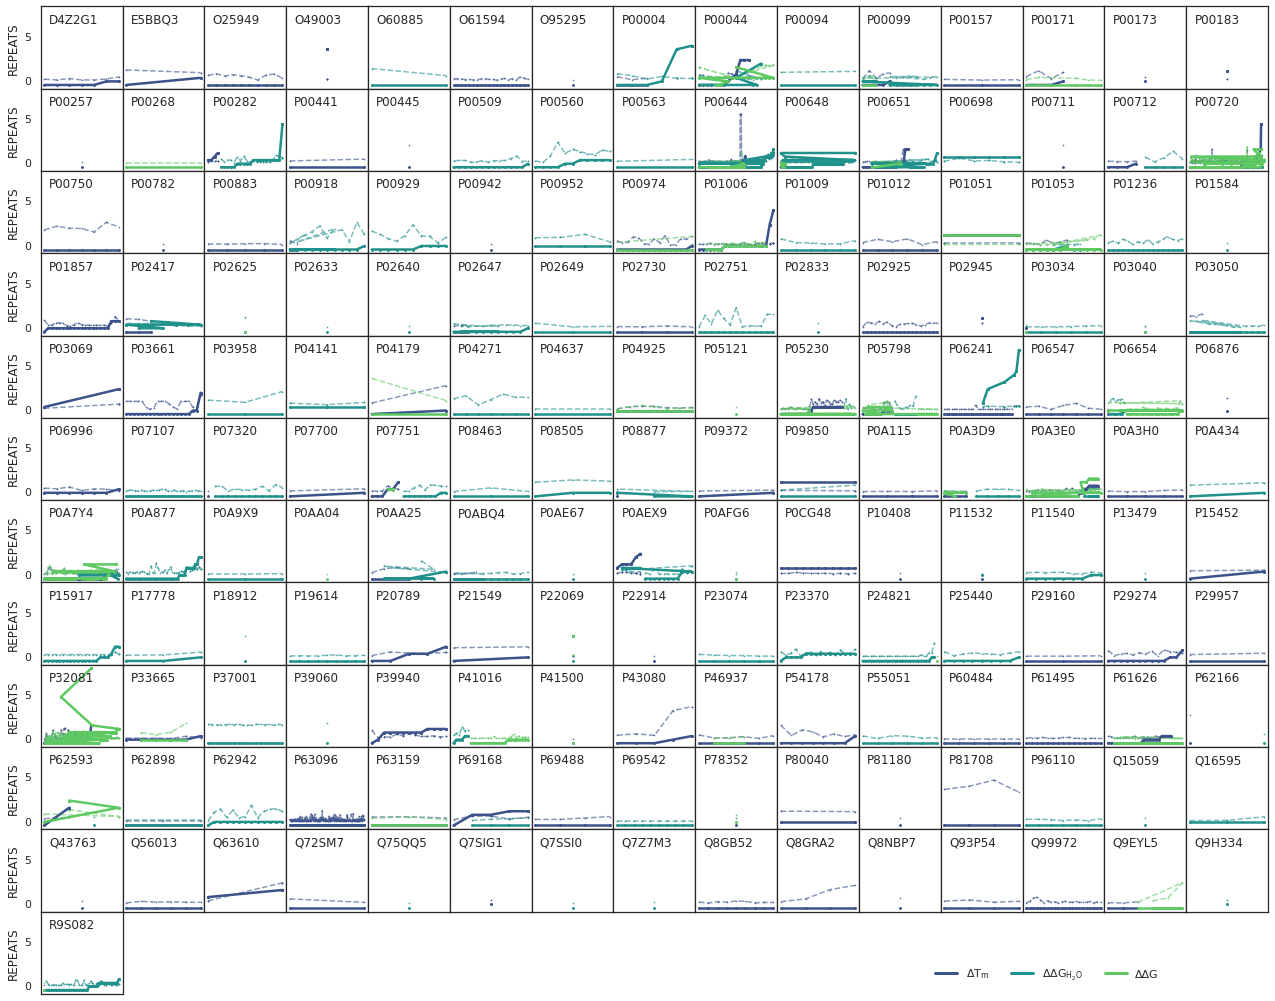

In [22]:
# repeats per ID and standard deviation
df = fresh_df()
df = df.loc[df.REPEATS > 1]\
    .sort_values(by=['UniProt_ID', 'REPEATS'], ascending=True)

numerics = df.select_dtypes(include=np.number).columns.tolist()
for c in df.columns:
    if c in numerics:
        df[c] = (df[c] - df[c].mean()) / df[c].std()

def get_std(gdf):
    gdf['STD'] = gdf[gdf.DELTA.iat[0]].std()
    return gdf
df = df.groupby(['UniProt_ID', 'MUTATION', 'DELTA']).apply(get_std)

sns.set_theme(style='white')
g = sns.FacetGrid(data=df, col='UniProt_ID',
                  col_wrap=15, sharex=False,
                  aspect=1, height=1.2,
                  hue='DELTA', palette='viridis')
g.map(plt.plot, 'MUTATION', 'STD',
      marker='.', markersize=1, alpha=.6,
      linestyle='--', linewidth=1.5,
      label='DELTA')
g.map(plt.plot, 'MUTATION', 'REPEATS',
      marker='.', markersize=3,
      linestyle='-', linewidth=2.5,
      label='DELTA')


# add the UniProt_IDs as an annotation within the plots
for uniprot_id, ax in g.axes_dict.items():
    ax.text(.1, .8, uniprot_id, transform=ax.transAxes)

g.add_legend(title='', adjust_subtitles=True, ncol=3, bbox_to_anchor=(.7, .05))
[l.set_linewidth(3) for l in g.legend.legendHandles]
relabel(g.legend)

g.set(xlabel='', xticklabels=[], title='') #, ylim=(0,25))
g.despine(top=False, right=False) #offset=0, left=True, bottom=True)
g.fig.subplots_adjust(wspace=0, hspace=0) # or g.fig.tight_layout(w_pad=0, h_pad=0)

g.savefig(wd / 'plots' / 'repeats_per_ID_z_scaled.png' , dpi=150)


---
### Comparing dataset sizes and share of redundant sequences

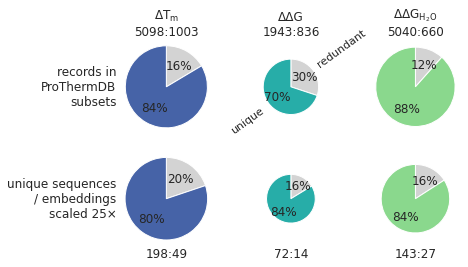

In [229]:
def df_pivot(ndf, subtract=False):
    ndf = ndf.pivot(index='DATASET', columns='DELTA',
                    values='LENGTH').transpose()
    if subtract:
        ndf.full_set -= ndf.reduced_set
    ndf.columns = ['redundant', 'unique']
    ndf = ndf.reindex(delta_order)
    avg = (sum(ndf.redundant) + sum(ndf.unique)) // 3
    return ndf

df = fresh_df()
records_df = df.groupby(['DATASET', 'DELTA'])\
    ['LENGTH'].count().reset_index()
records_df = df_pivot(records_df)
# records_df
#
#
## %%

scale = 25
seq_df = {'reduced_set': data.reduced_set_lengths,
            'full_set': data.full_set_lengths}
seq_df = [[dataset, delta, len(vals)] for dataset, dc in seq_df.items() for delta, vals in dc.items()]

seq_df = pd.DataFrame.from_records(seq_df, columns=['DATASET', 'DELTA', 'LENGTH'])
seq_df.DELTA = seq_df.DELTA.apply(
    {'melttemp':'∆Tm_(C)', 'delta_g': '∆∆G_(kcal/mol)',
     'delta_g_h2o': '∆∆G_H2O_(kcal/mol)'}.get)
seq_df = df_pivot(seq_df, True)
seq_df *= scale
# seq_df
#
#
# #%%

vir = sns.color_palette('viridis', 3, as_cmap=False)
vir = [adjust_lightness(i, 1.2) for i in vir]
fig, ax = plt.subplots(2,3, figsize=(6.6,4))

ax = ax.flatten()
for j, df_now in zip([0, 3], [records_df, seq_df]):
    for i, cat in enumerate(df_now.index):
        df_now.loc[cat].plot.\
            pie(ax=ax[i+j],
                autopct='%1.f%%', counterclock=False,
                labels=['redundant', 'unique'] if cat == '∆∆G_(kcal/mol)' and j == 0 else ['', ''],
                startangle=90, rotatelabels=True,
                radius=np.sqrt(sum(df_now.loc[cat]) / avg),
                colors=['lightgray', vir[i]])
        ax[i+j].set_ylabel('')

        if j == 0:
            ax[i+j].set_title('%s\n%s' % (lookup[cat], ':'.join(
                [str(i) for i in df_now.loc[cat]][::-1])))
        else:
            ax[i+j].set_title('%s' % ':'.join(
                ['%g' % (i/scale) for i in df_now.loc[cat]][::-1]),
                              y=-.2)
ax[0].set_ylabel('records in\nProThermDB\nsubsets', rotation='horizontal', ha='right', va='center')
ax[3].set_ylabel('unique sequences\n/ embeddings\nscaled %d×'
                 % scale, rotation='horizontal', ha='right', va='center')

#fig.suptitle('relative dataset size for different measurements and share of homologous samples')
fig.tight_layout()
fig.savefig(wd / 'plots' / 'dataset_sizes_compositions.png', dpi=150,
            facecolor='white', bbox_inches='tight', pad_inches=.1)

---
### Counting numbers of mutations per line (= not per UniProt ID)


<ipython-input-17-1f7cbf95e779>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels([lookup[l] for l in delta_order])


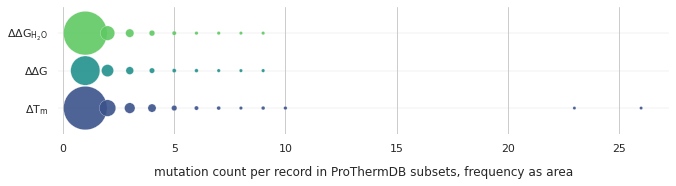

In [17]:
df = fresh_df()
cdf = df.groupby(['MUT_COUNT', 'DELTA'])['MUT_COUNT'].count().reset_index(name='freq')

sns.set_theme(style='whitegrid')
vir = sns.color_palette('viridis', 3, as_cmap=False)
# vir = [adjust_lightness(i, 1.2) for i in vir]

g = sns.relplot(
    data=cdf, alpha=.9, legend=False,
    x='MUT_COUNT', y='DELTA', size='freq',
    hue='DELTA', hue_order=delta_order, palette=vir,
    sizes=(10, 1900), height=2.4, aspect=4.4,
)

g.ax.xaxis.grid(True, 'major', linewidth=1)
g.ax.yaxis.grid(True, 'major', linewidth=.25)
g.ax.set_ylim(-.7, 2.7)
g.despine(left=True, bottom=True)
g.set_axis_labels('mutation count per record in ProThermDB subsets, frequency as area',
                  '', fontsize=12, labelpad=12)
g.ax.set_yticklabels([lookup[l] for l in delta_order])
g.savefig(wd / 'plots' / 'mutations_per_record.png', dpi=300)


---
### Unique annotated mutations per UniProt ID and metric

<ipython-input-18-a83d5e94d5da>:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels([toggle_label_on_size(l, 80) for
<ipython-input-18-a83d5e94d5da>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels([lookup[l.split(':')[0]] if l.endswith('n') else '' for l in new_delta_order])


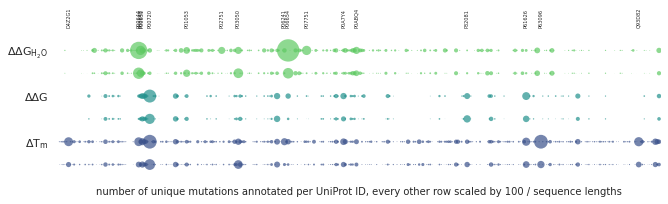

In [18]:
df = fresh_df()

uniprot = dict()
for row in df.itertuples():
    if row.DELTA not in uniprot:
        condition_dict = dict()
        uniprot[row.DELTA] = condition_dict
    else:
        condition_dict = uniprot[row.DELTA]
    if row.UniProt_ID in condition_dict:
        condition_dict[row.UniProt_ID] |= set(row.MUTATION.strip().split(' '))
    else:
        condition_dict[row.UniProt_ID] = set(row.MUTATION.strip().split(' '))
# len(uniprot), sum(len(v) for v in uniprot.values()), max(len(v) for v in uniprot.values())
#
#
# #%%

for cond, cdict in uniprot.items():
    for _id, idict in cdict.items():
        cdict[_id] = len(idict)
# uniprot

adf = pd.DataFrame.from_dict(uniprot, orient='index', dtype=int).fillna(0).convert_dtypes(convert_integer=True).transpose()
adf = adf.reset_index().rename(columns={'index': 'uniprot'})\
.melt(id_vars='uniprot').set_index('uniprot')\
    .rename(columns={'variable': 'DELTA', 'value': 'n_mutations'})\
    .sort_values(by='uniprot', ascending=True)

# also bind the sequence length to the adf DataFrame
len_dict = dict()
for d in [*data.full_set_lengths.values(), *data.reduced_set_lengths.values()]:
    len_dict.update(d)
adf['M_by_L'] = [n_mut / len_dict[acc] * 100 for acc, n_mut in zip(adf.index, adf.n_mutations)]
adf = adf.reset_index()
melt_cols = ['n_mutations', 'M_by_L']
adf = adf.melt(id_vars=[c for c in adf.columns if c not in melt_cols], value_vars=melt_cols)
adf.DELTA = [d+ ':z' if v == 'n_mutations' else d + ':by_len' for d, v in zip(adf.DELTA, adf.variable)]
# adf
#
#
# #%%

def toggle_label_on_size(lab, min_size):
    uniprot = lab.get_text()
    if max(adf.loc[adf.uniprot == uniprot]['value']) > min_size:
        return uniprot
    else:
        return ''

sns.set_theme(style='white')
vir = sns.color_palette('viridis', 3, as_cmap=False)
vir = [i for l in [[i]*2 for i in vir] for i in l]
new_delta_order = [j+ ':z' if k%2 == 0 else j + ':by_len'
                   for k,j in enumerate([i for l in [
        [d]*2 for d in delta_order] for i in l])]
adf = adf.sort_values(by=['DELTA', 'uniprot'])
# print(new_delta_order)
# adf
#
#
# #%%

g = sns.relplot(
    data=adf, alpha=.7,
    x='uniprot', y='DELTA',
    size='value', hue='DELTA',
    row_order=new_delta_order,
    hue_order=new_delta_order,
    palette=vir,
    sizes=(0, 500),
    height=3, aspect=3.2,
    legend=False,
)

g.set(ylabel='')
g.set_xlabels('number of unique mutations annotated per UniProt ID, '
              'every other row scaled by 100 / sequence lengths', fontsize=10)
g.ax.xaxis.tick_top()
g.ax.tick_params(top=False)
g.ax.set_xticklabels([toggle_label_on_size(l, 80) for
                      l in g.ax.get_xticklabels()],
                     rotation=90, fontsize=5)
g.ax.set_yticklabels([lookup[l.split(':')[0]] if l.endswith('n') else '' for l in new_delta_order])
g.ax.set_ylim(-0.8, 5.6)
g.ax.set_xlim(-1, len(adf.loc[adf.value != 0]['uniprot'].unique()))
g.despine(left=True, bottom=True)
g.tight_layout()
g.savefig(wd / 'plots' / 'max_mutations_per_uniprot_and_delta_by_length.png', dpi=300)

    P00644: Thermonuclease
    P00651: Guanyl-specific ribonuclease T1
    P00720: Endolysin
    P06654: Immunoglobulin G-binding protein G (448aa long)
    P07751: Spectrin alpha chain
    P63096: Guanine nucleotide-binding protein G(i) subunit alpha-1
    Q93D82: Halohydrin dehalogenase
